In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

/Users/cyian/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Assignment Owner: Tian Wang

#######################################
#### Normalization


def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    # TODO
    train_normalized = np.zeros((train.shape[0],train.shape[1]))
    test_normalized = np.zeros((test.shape[0],test.shape[1]))
    for idx in range(train.shape[1]):
        mean_val = np.mean(train[:,idx], axis = 0)
        max_val = np.max(train[:,idx], axis = 0)
        min_val = np.min(train[:,idx], axis = 0)
        
        if max_val > 1 or min_val<0 and (max_val != min_val):
            train_normalized[:,idx] = (train[:,idx] - min_val)/(max_val - min_val)
            test_normalized[:,idx] = (test[:,idx] - min_val)/(max_val - min_val)
        else:
            train_normalized[:,idx] = train[:,idx]
            test_normalized[:,idx] = test[:,idx]
        
    return (train_normalized, test_normalized)
        

In [3]:
df = pd.read_csv('data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

In [4]:
########################################
#### The square loss function

def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    #TODO
    m = X.shape[0]
    return 1/m*(np.dot(y.transpose(),y)-2*np.dot(np.dot(y.transpose(),X),theta)+
               np.dot(theta.transpose(),np.dot(X.transpose(), np.dot(X, theta))))


In [5]:
########################################
### compute the gradient of square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    m = X.shape[0]
    return 2/m*(-np.dot(X.transpose(), y) + np.dot(np.dot(X.transpose(),X), theta))
    


In [6]:
###########################################
### Gradient Checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm.  Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1)

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    for i in range(num_features):
        e_i = np.zeros(num_features)
        e_i[i] = 1
        approx_grad[i] = (compute_square_loss(X, y, theta+epsilon*e_i)-compute_square_loss(X, y, theta-epsilon*e_i))/(2*epsilon)
    distance = np.linalg.norm(approx_grad-true_gradient.transpose())
    if distance > tolerance:
        return False
    return True


In [7]:
#################################################
### Generic Gradient Checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. And check whether gradient_func(X, y, theta) returned
    the true gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    true_gradient = gradient_func(X,y,theta)
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    for i in range(num_features):
        e_i = np.zeros(num_features)
        e_i[i] = 1
        approx_grad[i] = (objective_func(X, y, theta+epsilon*e_i)-objective_func(X, y, theta-epsilon*e_i))/(2*epsilon)
    distance = np.linalg.norm(approx_grad-true_gradient.transpose())
    if distance > tolerance:
        return False
    return True

In [8]:
####################################
#### Batch Gradient Descent
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run
        check_gradient - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features)
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.zeros(num_features) #initialize theta
    #TODO
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X,y,theta)
    for i in range(num_iter):
        if check_gradient and (not grad_checker(X,y,theta_hist[i])):
            return False
        elif (not check_gradient) or (check_gradient and grad_checker(X,y,theta_hist[i])):
            grad = compute_square_loss_gradient(X,y,theta_hist[i])
            loss = compute_square_loss(X,y,theta_hist[i])
            theta_hist[i+1] = theta_hist[i]-alpha*grad
            loss_hist[i+1] = loss
    if check_gradient and (not grad_checker(X,y,theta_hist[num_iter])):
        return False
    return (theta_hist, loss_hist)

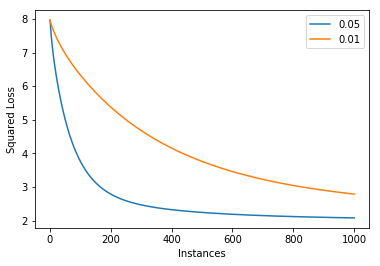

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
plot_mat = []
legend_list = []
alpha_list = [0.5, 0.1, 0.05, 0.01]
for idx in alpha_list:
    temp = batch_grad_descent(X_train,y_train,alpha=idx, num_iter=1000, check_gradient=True)
    if isinstance(temp, tuple):
        legend_list.append(idx)
        theta_h, loss_h = batch_grad_descent(X_train,y_train,alpha=idx, num_iter=1000, check_gradient=True)
        plot_mat.append(loss_h)
for i in range(len(plot_mat)):
    plt.plot(plot_mat[i])
plt.xlabel("Instances")
plt.ylabel('Squared Loss')
plt.legend(legend_list)
plt.show()

In [10]:
####################################
###Q2.4b: Implement backtracking line search in batch_gradient_descent
###Check http://en.wikipedia.org/wiki/Backtracking_line_search for details
#TODO

In [11]:
compute_square_loss_gradient(X,y,theta).shape

NameError: name 'theta' is not defined

In [12]:
###################################################
### Compute the gradient of Regularized Batch Gradient Descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg=1):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    m = X.shape[0]
    return 2/m*(-np.matmul(X.transpose(), y) + np.matmul(X.transpose(), np.matmul(X,theta)))+2*lambda_reg*theta

In [13]:
 regularized_grad_descent(X_train, y_train, alpha= 0.25)

NameError: name 'regularized_grad_descent' is not defined

In [14]:
###################################################
### Batch Gradient Descent with regularization term
def regularized_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features)
        loss_hist - the history of loss function without the regularization term, 1D numpy array.
    """
    (num_instances, num_features) = X.shape
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    #TODO
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X,y,theta)
    for i in range(num_iter):
        grad = compute_regularized_square_loss_gradient(X, y, theta_hist[i], lambda_reg)
        theta_hist[i+1] = theta_hist[i]-alpha*grad
        loss = compute_square_loss(X,y,theta_hist[i+1])
        loss_hist[i+1] = loss
    return (theta_hist, loss_hist)

In [74]:
#############################################
## Visualization of Regularized Batch Gradient Descent
##X-axis: log(lambda_reg)
##Y-axis: square_loss
lambda_list1 = [-7, -5, -3,-2, -1, 0, 1, 2]
def plot_regularized_batch(X_tr, y_tr, X_te, y_te, lambda_list):
    train_loss_final_list = []
    test_loss_final_list = []
    for i in lambda_list:
        train_theta, train_loss = regularized_grad_descent(X_tr, y_tr, alpha = 0.025, lambda_reg=10**(i))
        theta = train_theta[-1]
        train_loss_final_list.append(compute_square_loss(X_tr,y_tr,theta))
        test_loss_final_list.append(compute_square_loss(X_te,y_te,theta))
    
    plt.plot(lambda_list, train_loss_final_list, label = 'Train')
    plt.plot(lambda_list, test_loss_final_list, label = 'Test')
    plt.xlabel = 'log(lambda_reg)'
    plt.ylabel = 'Square Loss'
    plt.legend()
    return plt.show()

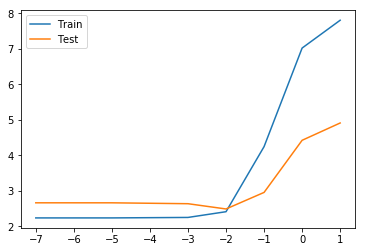

In [75]:
plot_regularized_batch(X_train, y_train, X_test, y_test, lambda_list1)

In [76]:
lambda_list2 = [-3, -2.8, -2.6, -2.4, -2.2, -2, -1.8, -1.6, -1.4]

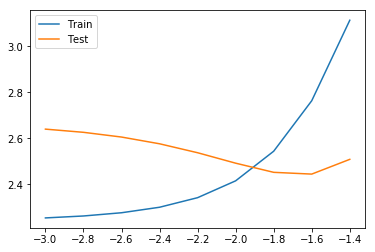

In [77]:
plot_regularized_batch(X_train, y_train, X_test, y_test, lambda_list2)

In [78]:
lambda_list3 = [-2, -1.95, -1.9, -1.85, -1.8]

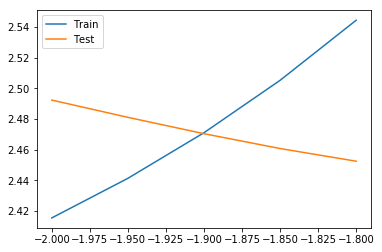

In [79]:
plot_regularized_batch(X_train, y_train, X_test, y_test, lambda_list3)

In [37]:
def compute_sgd_loss(X, y, theta, lambda_reg):
    return (np.dot(theta,X)-y)**2 + lambda_reg*np.dot(theta,theta)
def compute_sgd_gradient(X, y, theta, lambda_reg):
    return 2*(np.dot(theta, X)-y)*X + 2 * lambda_reg*theta
    #return (np.dot(theta, X)-y)*X + 2*lambda_reg*theta

In [72]:
#############################################
### Stochastic Gradient Descent
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a  fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features)
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta


    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    #TODO
#     grad0 = compute_square_loss_gradient(X[row], y, theta_hist[i][row]) + 2*lambda_reg*theta_hist[i][row]
    step_size = 10
    
    for i in range(num_iter):
        change_idx = np.arange(num_instances)
        np.random.shuffle(change_idx)
        for row in change_idx:
            theta_hist[i][row] = theta
            loss_hist[i][row] = compute_sgd_loss(X[row], y[row], theta, lambda_reg)
            grad = compute_sgd_gradient(X[row], y[row], theta, lambda_reg)
            if isinstance(alpha, float):
                theta = theta - alpha*grad
            elif alpha == '1/sqrt(t)':
                theta = theta - 1./np.sqrt(step_size)*grad
                step_size += 1
            elif alpha == '1/t':
                theta = theta - 1./step_size*grad
                step_size += 1
            else:
                theta = theta - theta/(1+step_size*lambda_reg*theta)*grad
                step_size += 1
    return (theta_hist, loss_hist)

In [ ]:
ex1 = np.arange(10).reshape(2,5)
ex1

In [ ]:
ex2 = np.arange(11,13).reshape(2,1)
ex2

In [ ]:
c = np.hstack((ex1, ex2))
c = np.random.permutation(c)
c

In [ ]:
a = c[:,:-1]
c[:,-1].transpose()

In [ ]:
qq1 = np.arange(1,4)
qq2 = np.arange(4,7)
np.dot(qq1, qq2)

In [ ]:
a

In [ ]:
X = np.arange(200).reshape(100, 2)
y = np.arange(100)
new_arr = np.hstack((X,y[:,np.newaxis]))
new_arr = np.random.permutation(new_arr)
X_new = new_arr[:,:-1]
y_new =  new_arr[:,-1]
print(len(X_new[0]))
print(y_new[0])

In [46]:
lambda_reg_cal = pow(10,-1.9)

/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


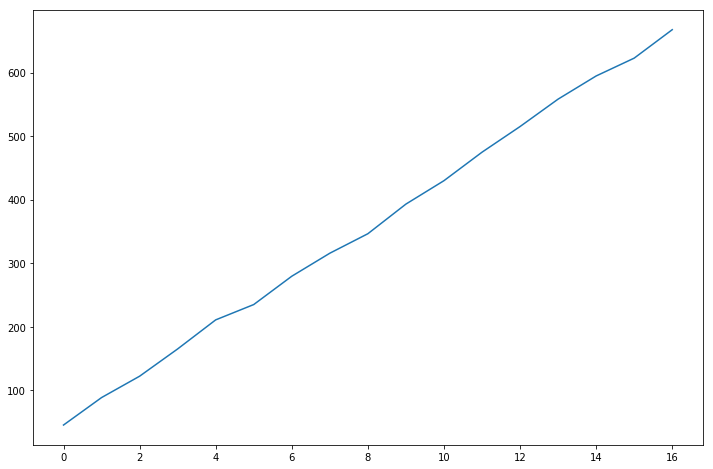

In [80]:
num_iteration_ = 1000
theta_train_, loss_train_ = stochastic_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=lambda_reg_cal, num_iter = num_iteration_)
num_ins = X_test.shape[0]
loss_test_ = np.zeros((num_iteration_, num_ins))
for idx in range(num_iteration_):
    for m in range(num_ins):
        loss_test_[idx] = loss_test_[idx] + compute_sgd_loss(X_test[m], y_test[m], theta_train_[idx][m], lambda_reg=lambda_reg_cal)
plt.figure(figsize=(12,8))
plt.plot(np.log(1/num_ins*loss_test_[:,0]))
plt.show()

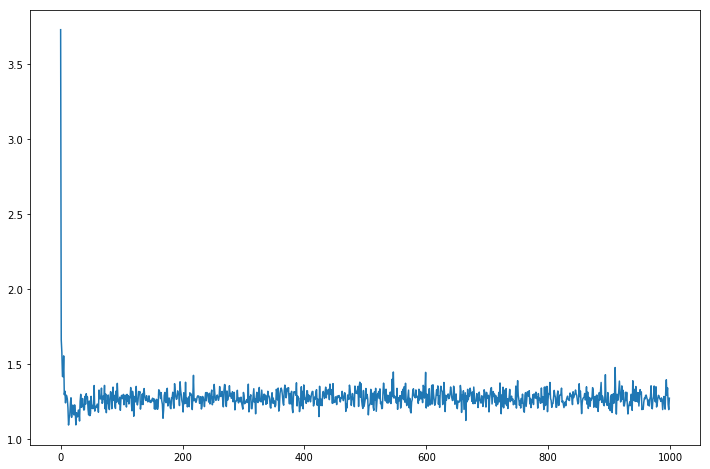

In [52]:
num_iteration = 1000
theta_train, loss_train = stochastic_grad_descent(X_train, y_train, alpha=0.005, lambda_reg=lambda_reg_cal, num_iter = num_iteration)
num_ins = X_test.shape[0]
loss_test = np.zeros((num_iteration, num_ins))
for idx in range(num_iteration):
    for m in range(num_ins):
        loss_test[idx] = loss_test[idx] + compute_sgd_loss(X_test[m], y_test[m], theta_train[idx][m], lambda_reg=lambda_reg_cal)
plt.figure(figsize=(12,8))
plt.plot(np.log(1/num_ins*loss_test[:,0]))
plt.show()

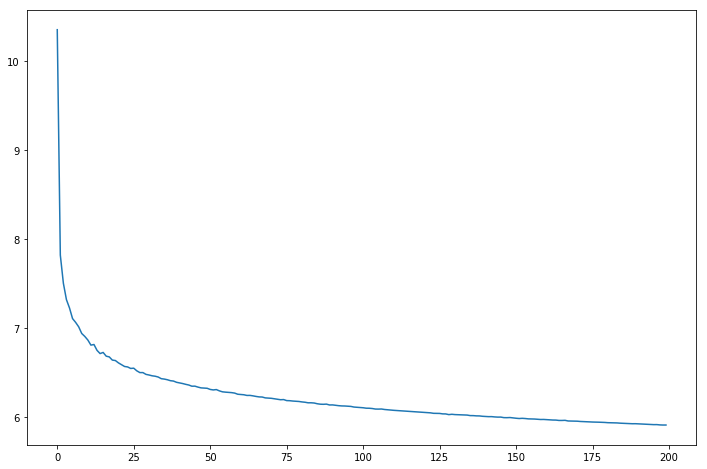

In [63]:
num_iteration2 = 200
theta_train2, loss_train2 = stochastic_grad_descent(X_train, y_train, alpha='1/t', lambda_reg=lambda_reg_cal, num_iter = num_iteration)
#theta_test, loss_test = stochastic_grad_descent(X_test, y_test, alpha=0.05, lambda_reg=lambda_reg_cal)
loss_test2 = np.zeros((num_iteration2, num_ins))
for idx in range(num_iteration2):
    for m in range(num_ins):
        loss_test2[idx] = loss_test2[idx] + compute_sgd_loss(X_test[m], y_test[m], theta_train2[idx][m], lambda_reg=lambda_reg_cal)
plt.figure(figsize=(12,8))
plt.plot(np.log(1/num_ins*loss_test2[:,0]))
#plt.plot(loss_test, c = 'r')
#plt.legend()
plt.show()

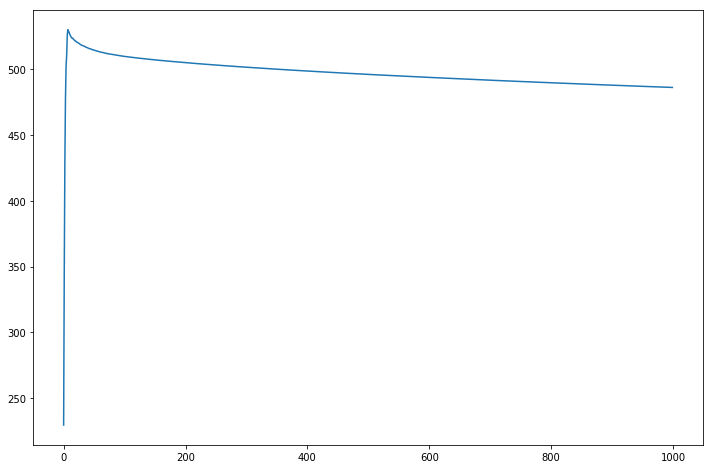

In [55]:
num_iteration3 = 1000
theta_train3, loss_train3 = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', lambda_reg=lambda_reg_cal, num_iter = num_iteration3)
#theta_test, loss_test = stochastic_grad_descent(X_test, y_test, alpha=0.05, lambda_reg=lambda_reg_cal)
loss_test3 = np.zeros((num_iteration3, num_ins))
for idx in range(num_iteration3):
    for m in range(num_ins):
        loss_test3[idx] = loss_test3[idx] + compute_sgd_loss(X_test[m], y_test[m], theta_train3[idx][m], lambda_reg=lambda_reg_cal)
plt.figure(figsize=(12,8))
plt.plot(np.log(1/num_ins*loss_test3[:,0]))
#plt.plot(loss_test, c = 'r')
#plt.legend()
plt.show()

/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Users/cyian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


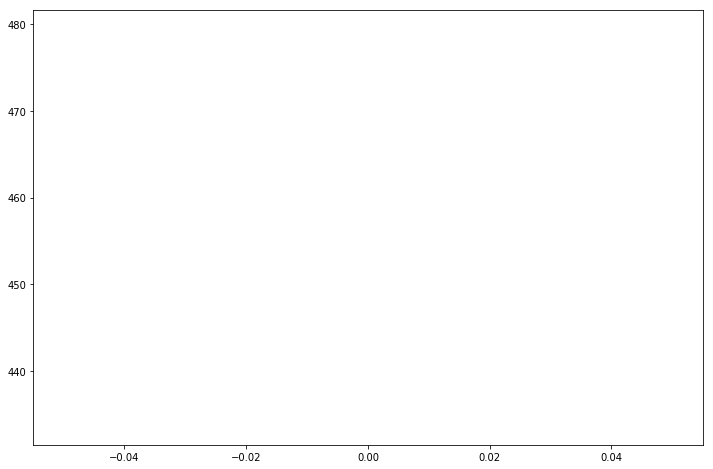

In [73]:
num_iteration4 = 1000
theta_train4, loss_train4 = stochastic_grad_descent(X_train, y_train, alpha='eta/(1+eta*lambda*t)', lambda_reg=lambda_reg_cal, num_iter = num_iteration4)
#theta_test, loss_test = stochastic_grad_descent(X_test, y_test, alpha=0.05, lambda_reg=lambda_reg_cal)
loss_test4 = np.zeros((num_iteration4, num_ins))
for idx in range(num_iteration4):
    for m in range(num_ins):
        loss_test4[idx] = loss_test4[idx] + compute_sgd_loss(X_test[m], y_test[m], theta_train4[idx][m], lambda_reg=lambda_reg_cal)
plt.figure(figsize=(12,8))
plt.plot(np.log(1/num_ins*loss_test4[:,0]))
#plt.plot(loss_test, c = 'r')
#plt.legend()
plt.show()

In [ ]:
################################################
### Visualization that compares the convergence speed of batch
###and stochastic gradient descent for various approaches to step_size
##X-axis: Step number (for gradient descent) or Epoch (for SGD)
##Y-axis: log(objective_function_value) and/or objective_function_value
lambda_reg_cal = pow(10,-1.9)
step_size_list = [0.05, 0.005]
for step in step_size_list:
    theta_h, loss_h = stochastic_grad_descent(X_train, y_train, alpha=step, lambda_reg = lambda_reg_cal)
    plt.plot(loss_h)
    plt.show()

In [ ]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

    # TODO

if __name__ == "__main__":
    main()
